# 샘플 데이터와 Boosting Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Sample Data
실습에서 사용할 데이터 생성

In [2]:
data = np.linspace(0, 6, 150)[:, np.newaxis]

label = np.sin(data).ravel() + np.sin(6 * data).ravel()
noise = np.random.normal(data.shape[0]) * 0.01
label += noise

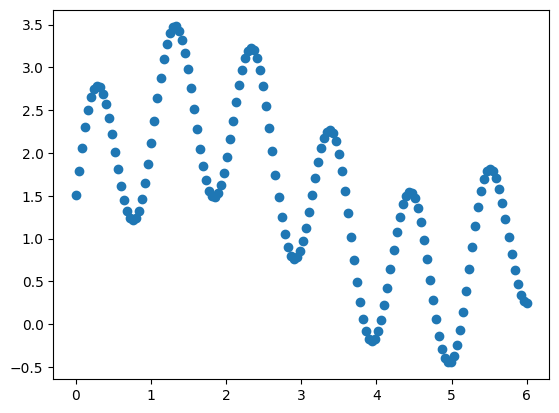

In [3]:
plt.scatter(data, label)

### 1.2 Data Split
시계열 데이터라고 가정하고 데이터를 나눔

In [4]:
train_size = 125
train_data, test_data = data[:train_size], data[train_size:]
train_label, test_label = label[:train_size], label[train_size:]

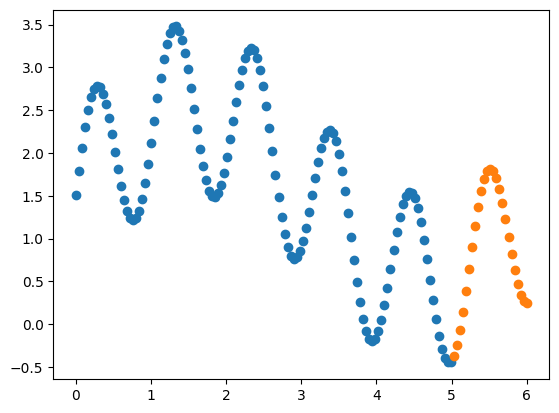

In [8]:
plt.scatter(train_data, train_label)
plt.scatter(test_data, test_label, color='C1')

## 2. Decision Tree
기본적인 Decision Tree를 학습 후 결과 비교

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)

### 2.1 학습

In [10]:
tree.fit(train_data, train_label)

DecisionTreeRegressor(max_depth=2)

### 2.2 예측

In [11]:
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

### 2.3 평가

In [12]:
from sklearn.metrics import mean_squared_error

tree_train_mse = mean_squared_error(train_label, tree_train_pred)
tree_test_mse = mean_squared_error(test_label, tree_test_pred)

In [13]:
print(f"Tree mean squared error is {tree_train_mse:.4f}")
print(f"Tree mean squared error is {tree_test_mse:.4f}")

Tree mean squared error is 0.3669
Tree mean squared error is 1.8188


## 2.4 시각화

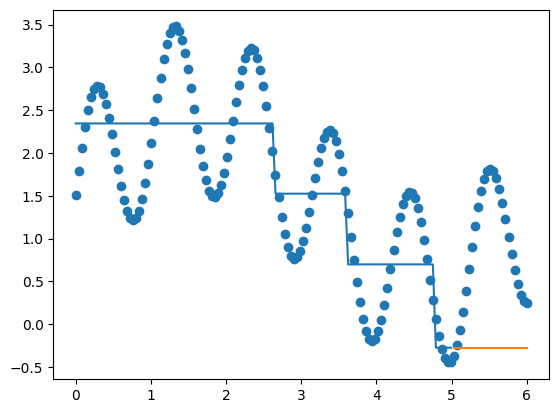

In [14]:
plt.scatter(data, label)
plt.plot(train_data, tree_train_pred)
plt.plot(test_data, tree_test_pred)

## 3. AdaBoost
다음은 AdaBoost를 학습  
AdaBoost는 `sklearn.ensemble`의 `AdaBoostRegressor`로 생성할 수 있음  
다른 모델과 다르고 `base_estimator`를 선언해주어야 함  
간단한 `if else`로 데이터가 분류될 수 있도록 depth가 1인 tree로 base estimator 생성

In [15]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1))

### 3.1 학습

In [16]:
ada_boost.fit(train_data, train_label)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1))

### 3.2 예측

In [17]:
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

### 3.3 평가

In [18]:
ada_boost_train_mse = mean_squared_error(train_label, ada_boost_train_pred)
ada_boost_test_mse = mean_squared_error(test_label, ada_boost_test_pred)

In [19]:
print(f"Ada Boost Train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Ada Boost Test mean squared error is {ada_boost_test_mse:.4f}")

Ada Boost Train mean squared error is 0.4615
Ada Boost Test mean squared error is 0.5289


### 3.4 시각화

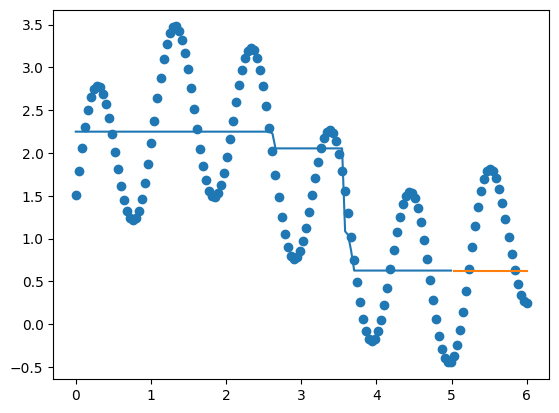

In [20]:
plt.scatter(data, label)
plt.plot(train_data, ada_boost_train_pred)
plt.plot(test_data, ada_boost_test_pred)

## 4. GradientBoost
GradientBoost를 사용하는 실습 진행  
GradientBoost는 `sklearn.ensemble`의 `GradientBoostingRegressor`로 생성  
GradientBoost도 간단한 `if else`로 만들 수 있또록 max_depth=1로 생성

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(max_depth=1)

### 4.1 학습

In [22]:
grad_boost.fit(train_data, train_label)

GradientBoostingRegressor(max_depth=1)

### 4.2 예측

In [23]:
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

### 4.3 평가

In [24]:
grad_boost_train_mse = mean_squared_error(train_label, grad_boost_train_pred)
grad_boost_test_mse = mean_squared_error(test_label, grad_boost_test_pred)

In [25]:
print(f"Gradient Boost Train mean squared error is {grad_boost_train_mse:.4f}")
print(f"Gradient Boost Test mean squared error is {grad_boost_test_mse:.4f}")

Gradient Boost Train mean squared error is 0.2767
Gradient Boost Test mean squared error is 1.3215


### 4.4 시각화

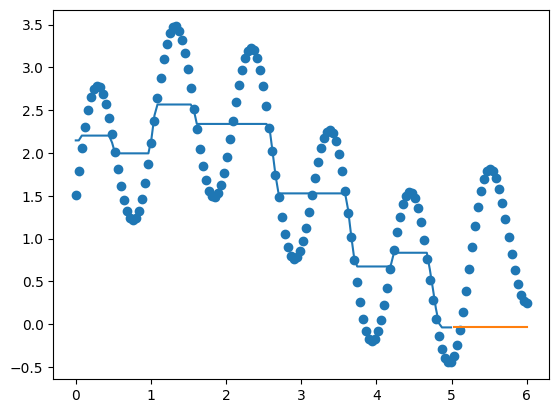

In [27]:
plt.scatter(data, label)
plt.plot(train_data, grad_boost_train_pred)
plt.plot(test_data, grad_boost_test_pred)

### 5. 마무리

In [29]:
print(f"Tree train mean squred error is {tree_train_mse:.4f}")
print(f"Ada Boost train mean squred error is {ada_boost_train_mse:.4f}")
print(f"Gradient Boost train mean squred error is {grad_boost_train_mse:.4f}")

Tree train mean squred error is 0.3669
Ada Boost train mean squred error is 0.4615
Gradient Boost train mean squred error is 0.2767


In [30]:
print(f"Tree test mean squred error is {tree_test_mse:.4f}")
print(f"Ada Boost test mean squred error is {ada_boost_test_mse:.4f}")
print(f"Gradient Boost test mean squred error is {grad_boost_test_mse:.4f}")

Tree test mean squred error is 1.8188
Ada Boost test mean squred error is 0.5289
Gradient Boost test mean squred error is 1.3215


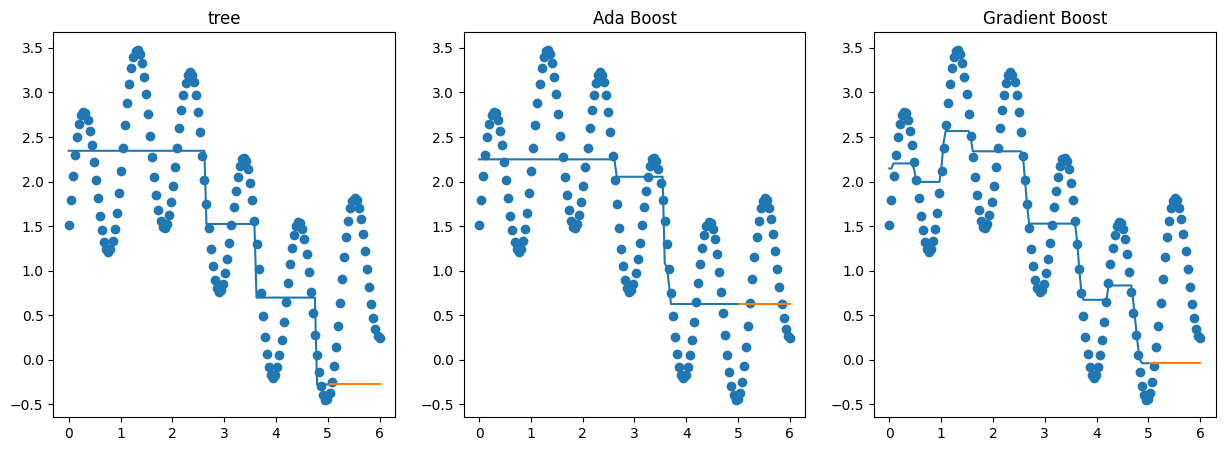

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ("tree", tree_train_pred, tree_test_pred),
    ("Ada Boost", ada_boost_train_pred, ada_boost_test_pred),
    ("Gradient Boost", grad_boost_train_pred, grad_boost_test_pred)
]

for idx, (name, train_pred, test_pred) in enumerate(preds):
  ax = axes[idx]
  ax.scatter(data, label)
  ax.plot(train_data, train_pred)
  ax.plot(test_data, test_pred)
  ax.set_title(name)